In [1]:
import os

import numpy as np

from scipy import ndimage

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as img

import astropy.time
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import ImageNormalize, SqrtStretch

from sunpy.net.helioviewer import HelioviewerClient
from sunpy.map import Map
from sunpy.net import Fido
from sunpy.net import attrs as a
from sunpy.net import helioviewer  

import imageio

In [2]:
hv = helioviewer.HelioviewerClient()  
for sourceid, obs in hv.data_sources.items():
    print(f"{sourceid}: {obs}")

('SOHO', 'EIT', None, '171'): 0
('SOHO', 'EIT', None, '195'): 1
('SOHO', 'EIT', None, '284'): 2
('SOHO', 'EIT', None, '304'): 3
('SOHO', 'LASCO', 'C2', 'white-light'): 4
('SOHO', 'LASCO', 'C3', 'white-light'): 5
('SOHO', 'MDI', None, 'magnetogram'): 6
('SOHO', 'MDI', None, 'continuum'): 7
('SDO', 'AIA', None, '94'): 8
('SDO', 'AIA', None, '131'): 9
('SDO', 'AIA', None, '171'): 10
('SDO', 'AIA', None, '193'): 11
('SDO', 'AIA', None, '211'): 12
('SDO', 'AIA', None, '304'): 13
('SDO', 'AIA', None, '335'): 14
('SDO', 'AIA', None, '1600'): 15
('SDO', 'AIA', None, '1700'): 16
('SDO', 'AIA', None, '4500'): 17
('SDO', 'HMI', None, 'continuum'): 18
('SDO', 'HMI', None, 'magnetogram'): 19
('STEREO_A', 'SECCHI', 'EUVI', '171'): 20
('STEREO_A', 'SECCHI', 'EUVI', '195'): 21
('STEREO_A', 'SECCHI', 'EUVI', '284'): 22
('STEREO_A', 'SECCHI', 'EUVI', '304'): 23
('STEREO_B', 'SECCHI', 'EUVI', '171'): 24
('STEREO_B', 'SECCHI', 'EUVI', '195'): 25
('STEREO_B', 'SECCHI', 'EUVI', '284'): 26
('STEREO_B', 'SECC

In [3]:
hv = HelioviewerClient()  
file = hv.download_jp2('2012/01/01', observatory="SDO", instrument="AIA", measurement="4500")  

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

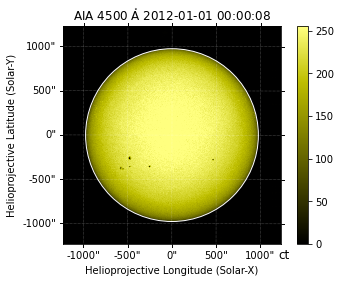

In [4]:
aia = Map(file)  
aia.peek(draw_limb=True) 

In [5]:
# aia_map = sunpy.map.Map(file)
# aia_map.plot()
# aia_map.draw_limb()

# # let's add contours as well
# aia_map.draw_contours([10,20,30,40,50,60,70,80,90] * u.percent)

# plt.colorbar()
# plt.show()

In [6]:
file

'/Users/waritwij/sunpy/data/2012_01_01__00_00_08_40__SDO_AIA_AIA_4500.jp2'

In [7]:
a = aia.data
print(a)

[[  0   2   0 ...   0   0   0]
 [252   0   2 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [8]:
com = ndimage.measurements.center_of_mass(a)
com

(2074.2758760443776, 2048.938685857621)

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


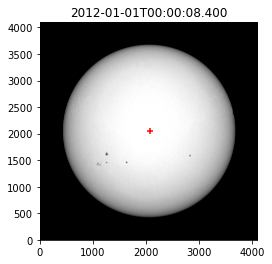

In [9]:
plt.imshow(a, origin = 'lower', cmap = 'gray', vmin = 0, vmax = 255)
plt.scatter(com[0], com[1], color = 'r', marker = '+')
plt.title(aia.date)
plt.show()

In [25]:
def plotCentroid(file, show_plot = True, save_fig = False):
    """
    Plots the image of a file and marks the 'center of flux' in the image.
    
    file: jp2 image
        The image fetched by HelioviewerClient.
        
    Returns the 'center of flux' coordinate.
    """
    file_map = Map(file)
    file_array = file_map.data
    com = ndimage.measurements.center_of_mass(file_array)
    
    plt.figure(figsize = (10, 10))
    plt.imshow(file_array, origin = 'lower', cmap = 'gray', vmin = 0, vmax = 255)
    plt.scatter(com[0], com[1], s = 400, color = 'r', marker = '+')
    plt.title(file_map.date)
    
    file_name = '/Users/waritwij/Documents/GitHub/astro_jitter/maps/' + file_map.date.value[:10] + '.png'
    
    if save_fig:
        plt.savefig(file_name, format = 'png')
 
    if show_plot:
        plt.show()
    else:
        print('plotted')
    
    return file_name

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


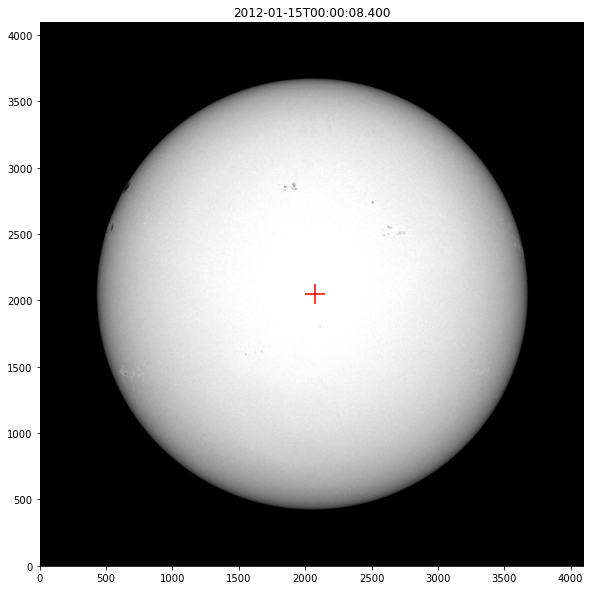

'/Users/waritwij/Documents/GitHub/astro_jitter/maps/2012-01-15.png'

In [26]:
plotCentroid(file)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

2012_01_16__00_00_08_40__SDO_AIA_AIA_4500.jp2:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

2012_01_17__00_00_08_40__SDO_AIA_AIA_4500.jp2:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

2012_01_18__00_00_08_40__SDO_AIA_AIA_4500.jp2:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

2012_01_19__00_00_08_40__SDO_AIA_AIA_4500.jp2:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

2012_01_20__00_00_08_40__SDO_AIA_AIA_4500.jp2:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

2012_01_21__00_00_08_40__SDO_AIA_AIA_4500.jp2:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

/var/folders/jy/sjsyz6954zv918vnjmc0xzfr0000gn/T/ipykernel_54799/3180508173.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (10, 10))
/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

2012_01_22__00_00_08_40__SDO_AIA_AIA_4500.jp2:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

2012_01_23__00_00_08_40__SDO_AIA_AIA_4500.jp2:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

2012_01_24__00_00_08_40__SDO_AIA_AIA_4500.jp2:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

2012_01_25__00_00_08_40__SDO_AIA_AIA_4500.jp2:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

2012_01_26__00_00_08_40__SDO_AIA_AIA_4500.jp2:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

2012_01_27__00_00_08_40__SDO_AIA_AIA_4500.jp2:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

2012_01_28__00_00_08_40__SDO_AIA_AIA_4500.jp2:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

2012_01_29__00_00_08_40__SDO_AIA_AIA_4500.jp2:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

2012_01_30__00_00_08_40__SDO_AIA_AIA_4500.jp2:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

2012_01_31__00_00_08_40__SDO_AIA_AIA_4500.jp2:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

/Users/waritwij/opt/anaconda3/envs/astro_jitter_env/lib/python3.8/site-packages/astropy/time/formats.py:1372: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  val1_uint32 = val1.view((np.uint32, val1.dtype.itemsize // 4))


plotted


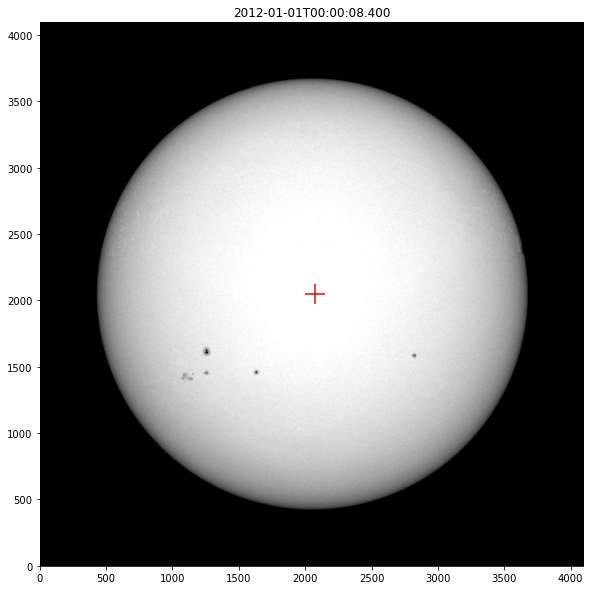

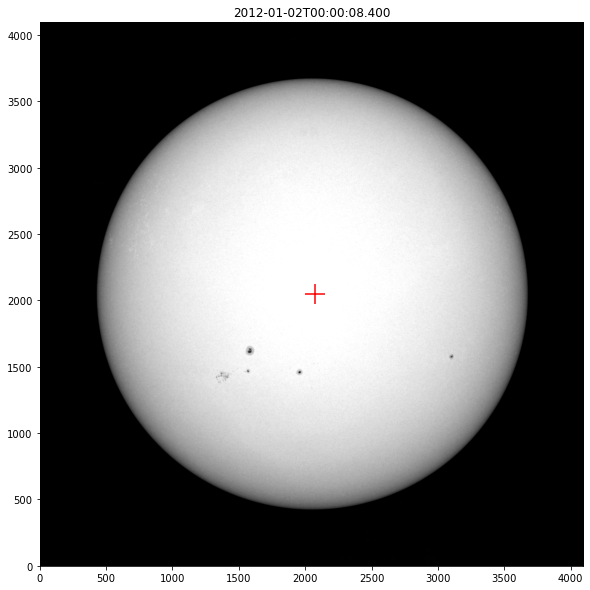

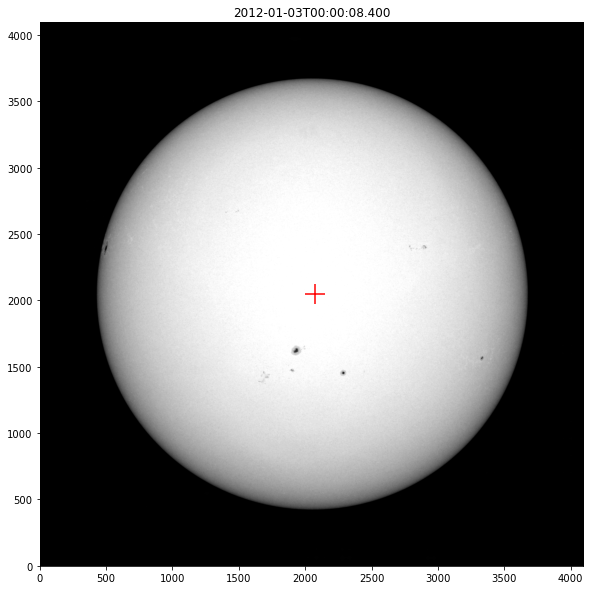

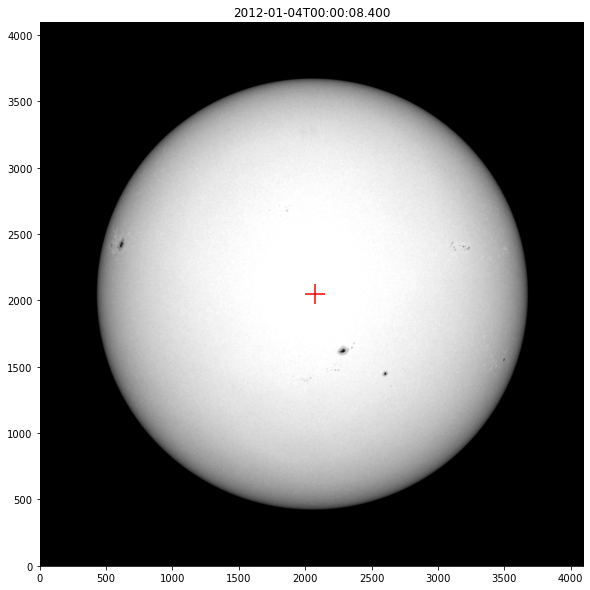

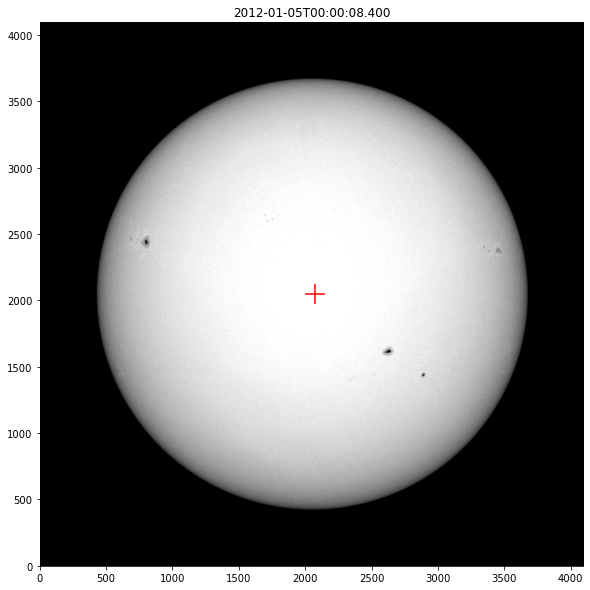

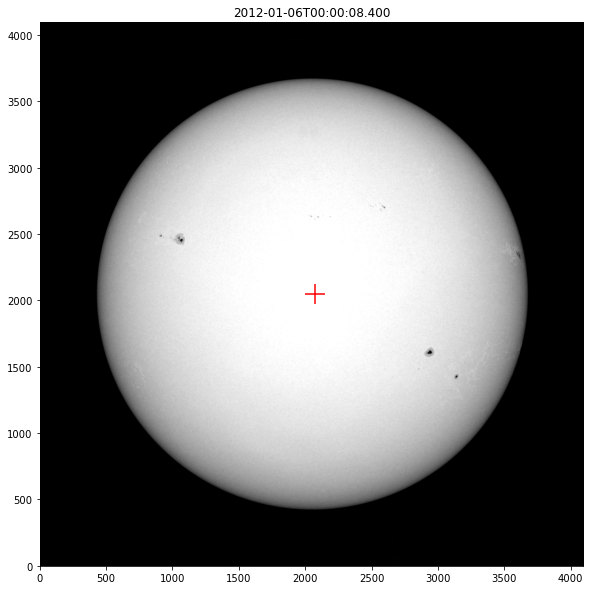

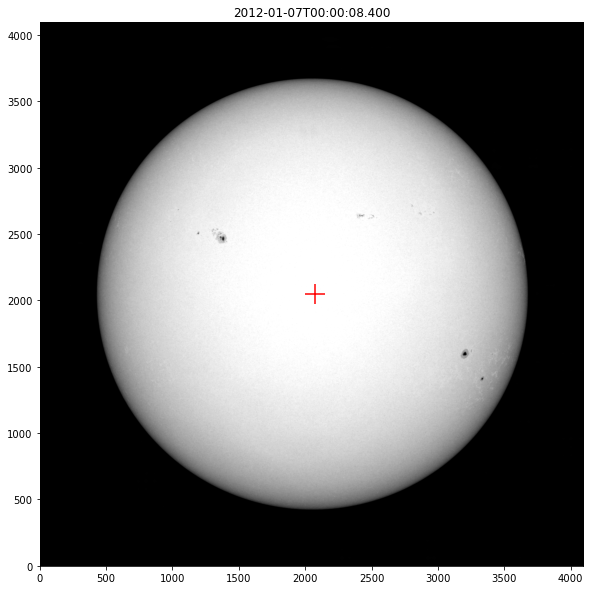

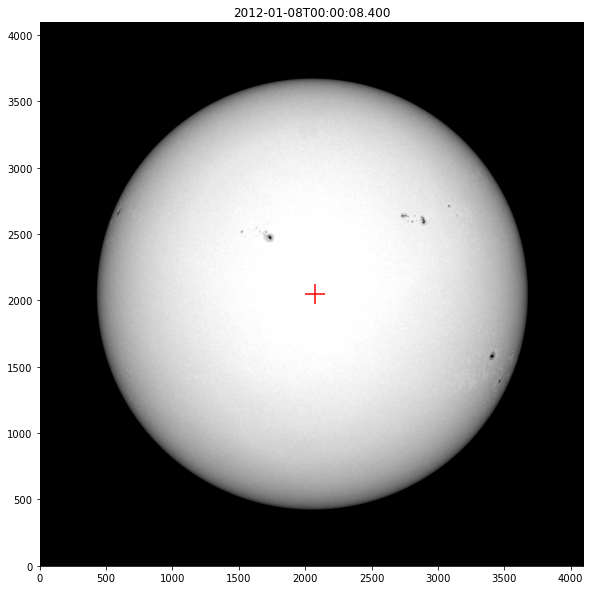

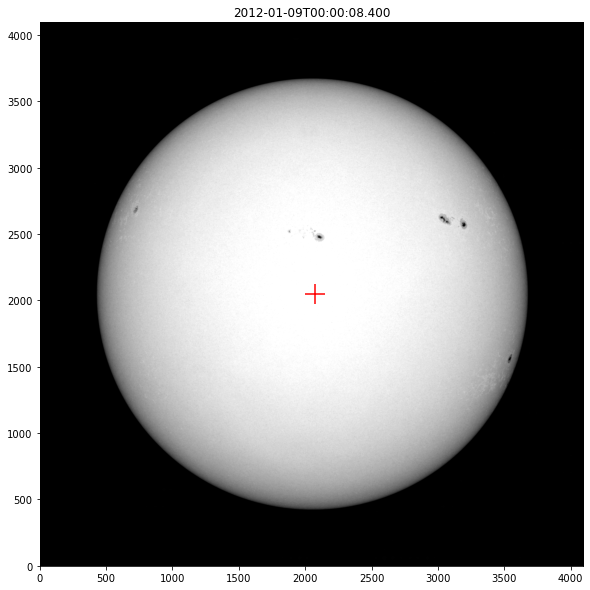

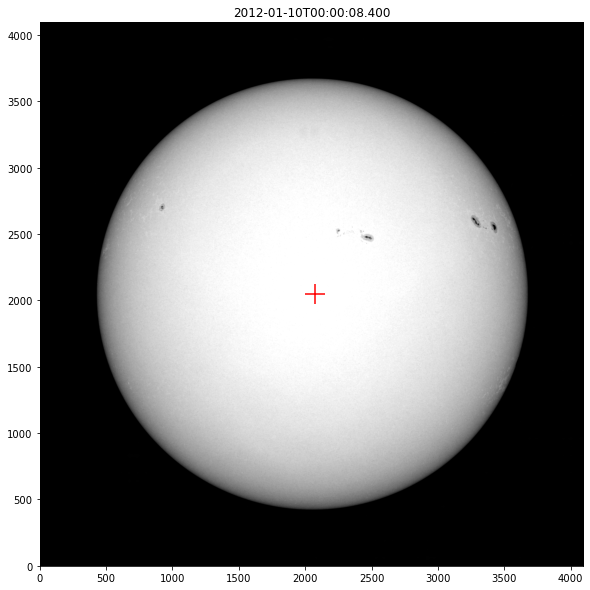

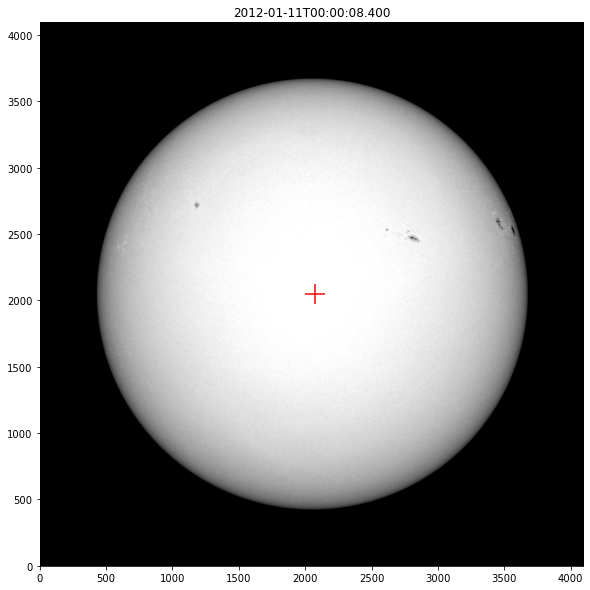

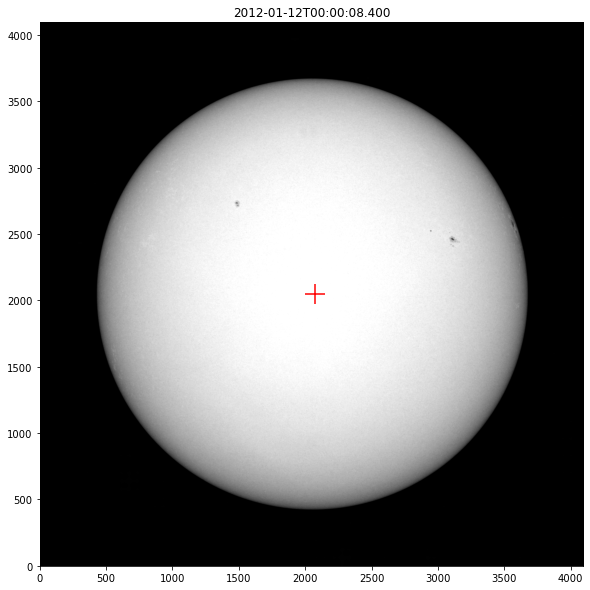

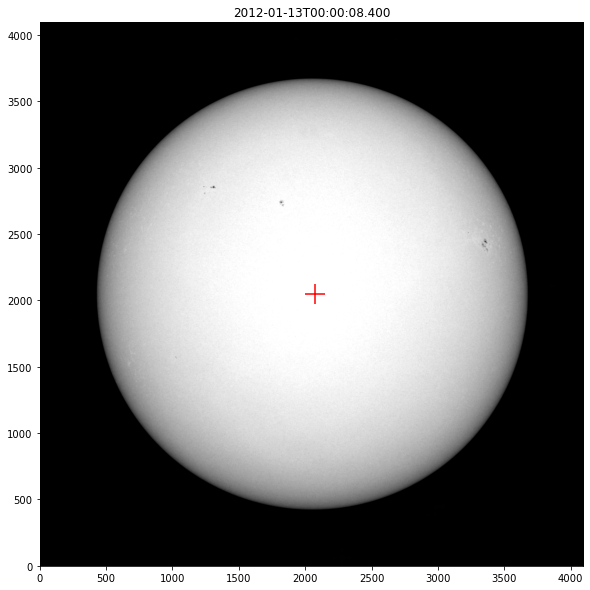

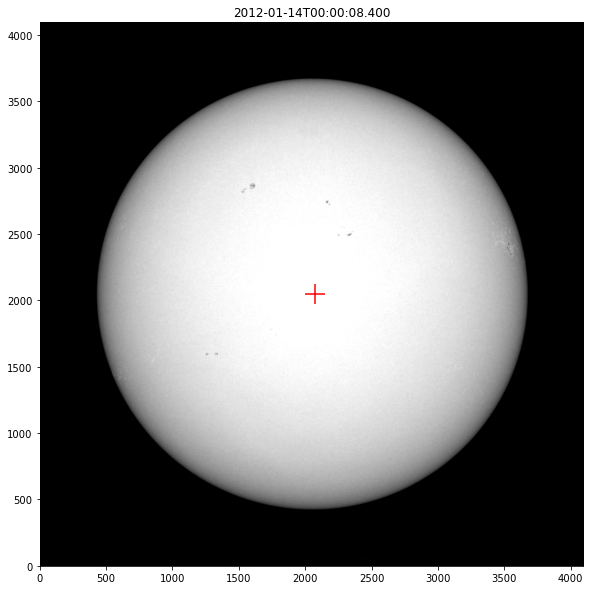

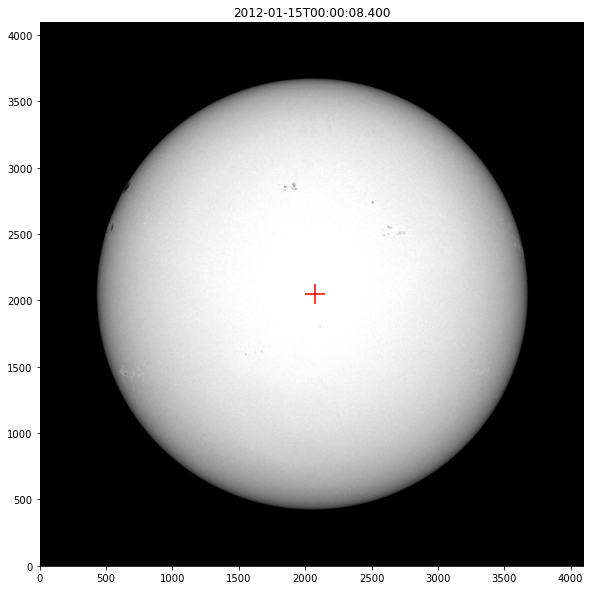

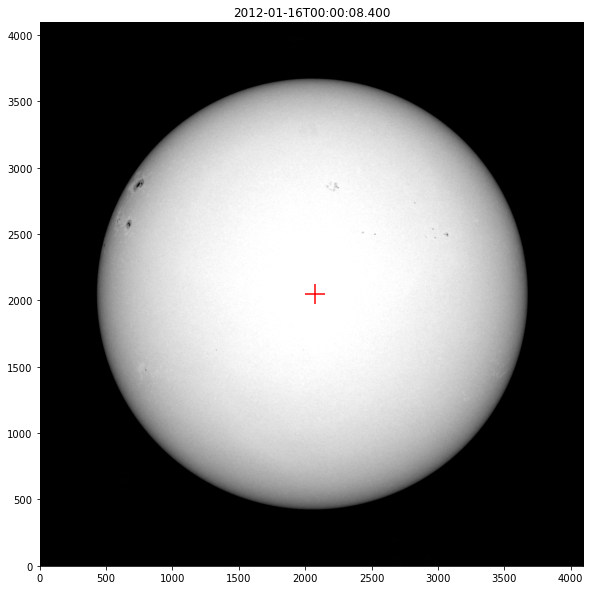

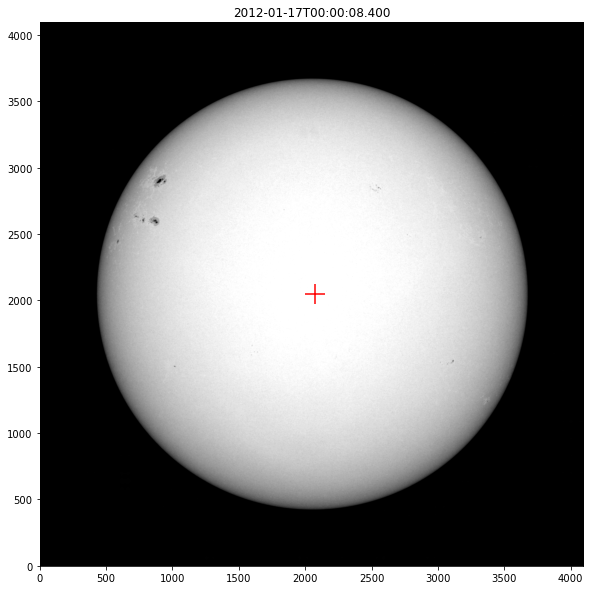

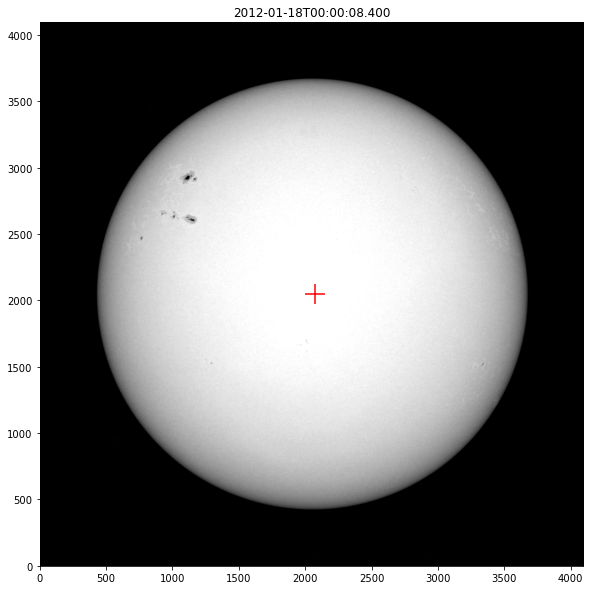

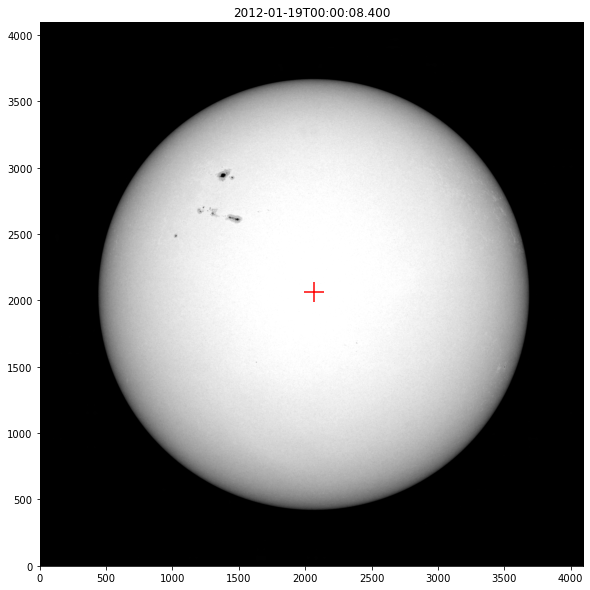

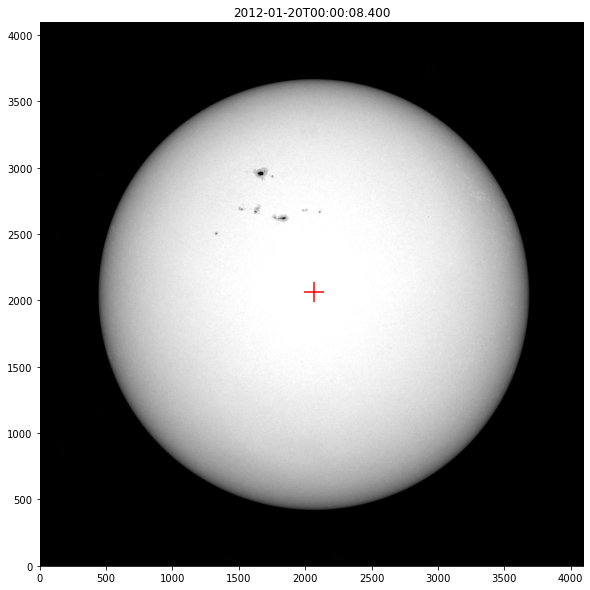

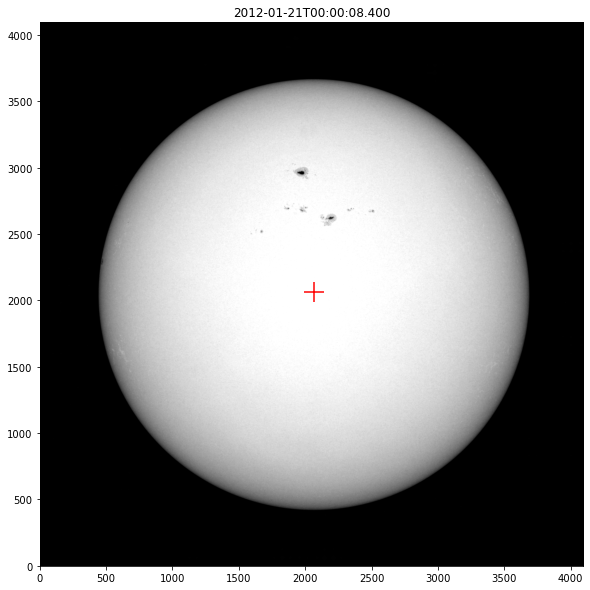

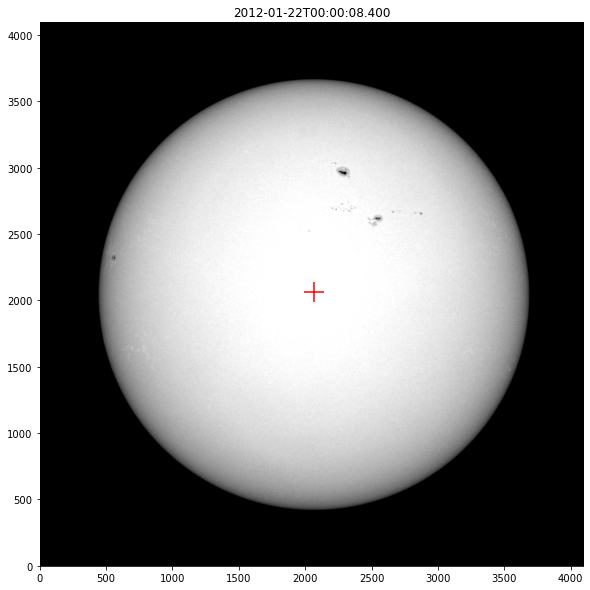

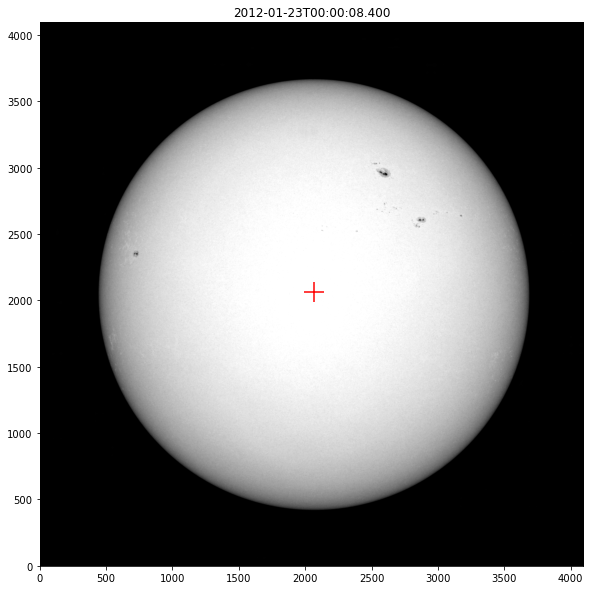

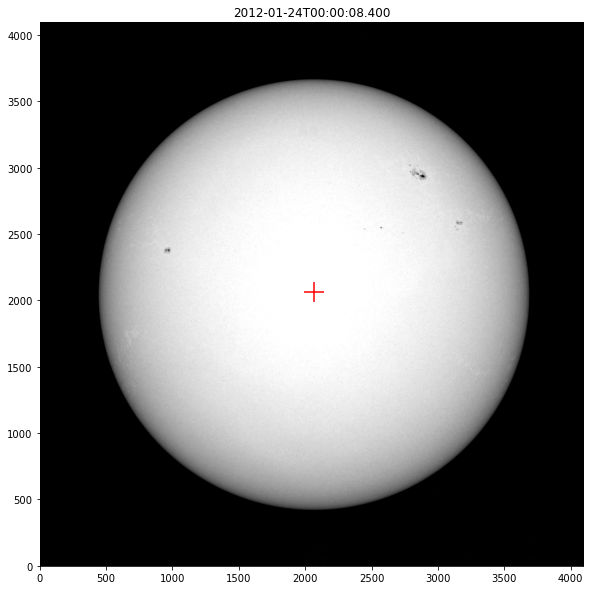

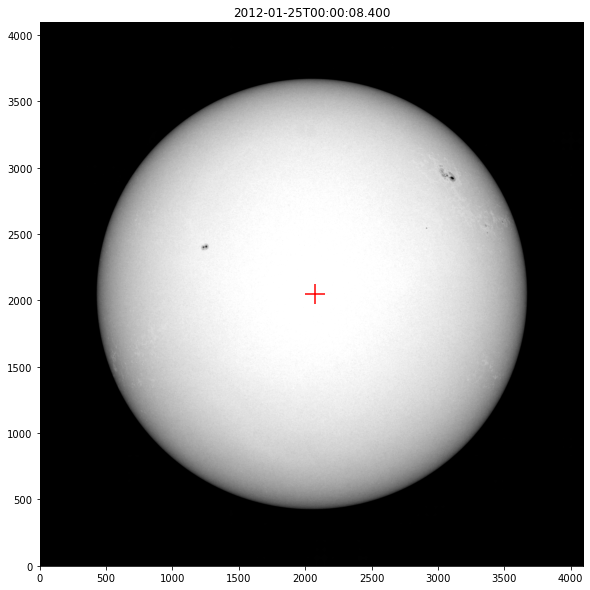

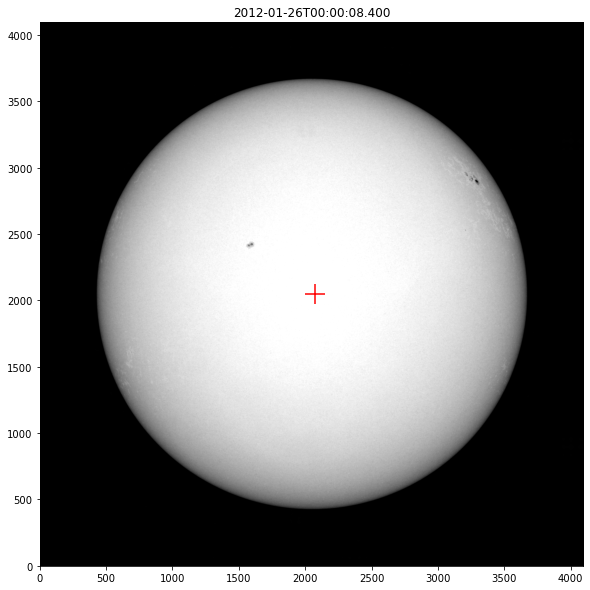

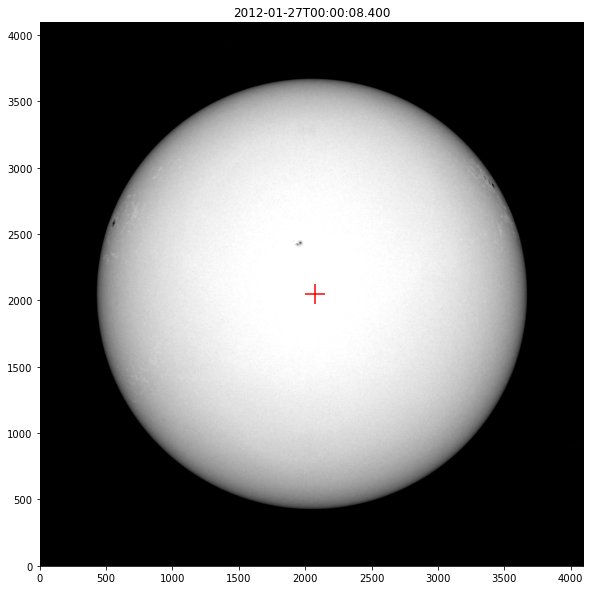

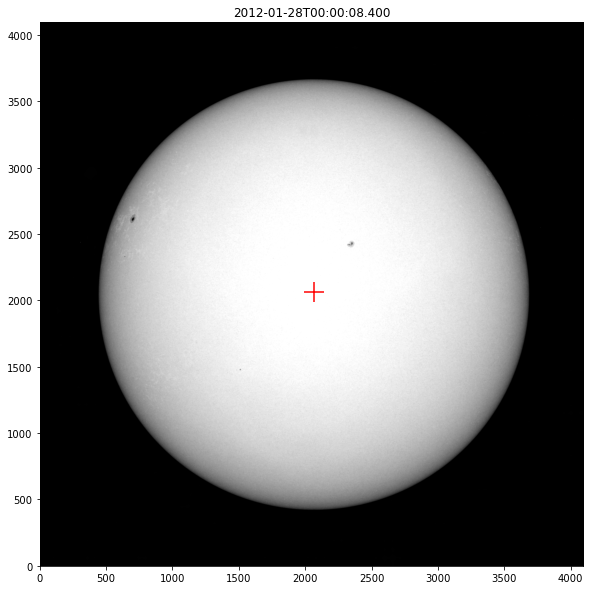

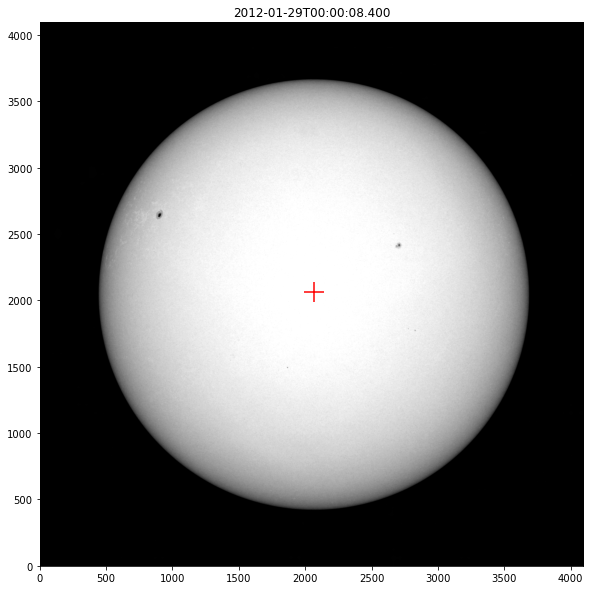

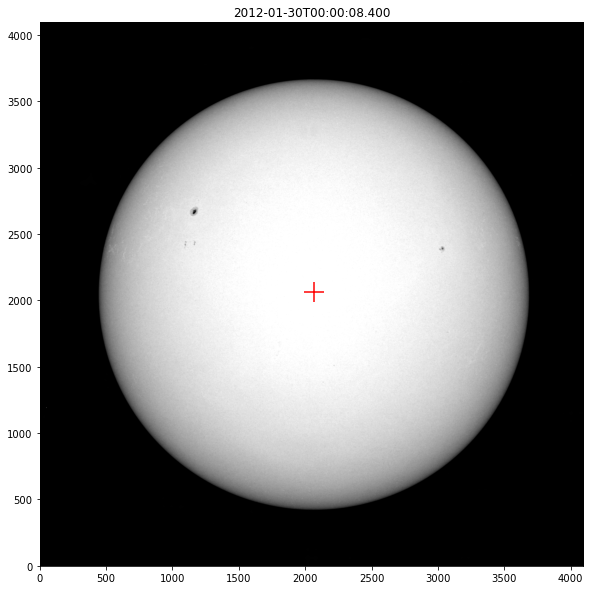

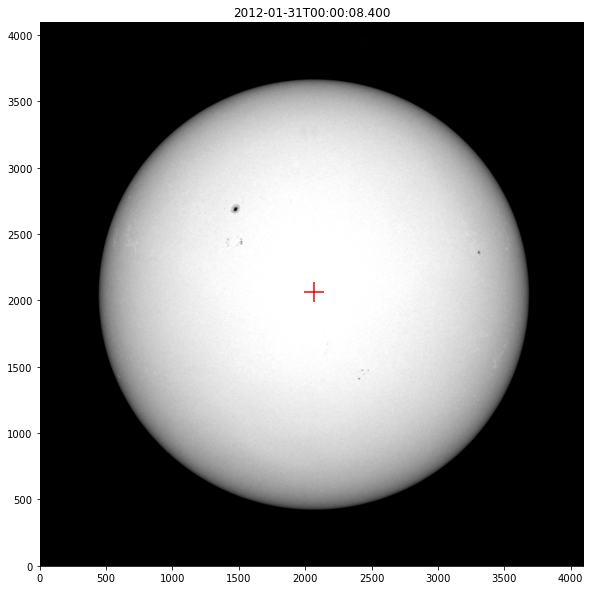

In [43]:
filenames = []
for i in range(1, 32):
    if i < 10:
        date = f'0{i}'
    else:
        date = f'{i}'
    file = hv.download_jp2('2012/01/' + date, observatory="SDO", instrument="AIA", measurement="4500")
    filenames.append(plotCentroid(file, show_plot = False, save_fig = True))

In [44]:
filenames

['/Users/waritwij/Documents/GitHub/astro_jitter/maps/2012-01-01.png',
 '/Users/waritwij/Documents/GitHub/astro_jitter/maps/2012-01-02.png',
 '/Users/waritwij/Documents/GitHub/astro_jitter/maps/2012-01-03.png',
 '/Users/waritwij/Documents/GitHub/astro_jitter/maps/2012-01-04.png',
 '/Users/waritwij/Documents/GitHub/astro_jitter/maps/2012-01-05.png',
 '/Users/waritwij/Documents/GitHub/astro_jitter/maps/2012-01-06.png',
 '/Users/waritwij/Documents/GitHub/astro_jitter/maps/2012-01-07.png',
 '/Users/waritwij/Documents/GitHub/astro_jitter/maps/2012-01-08.png',
 '/Users/waritwij/Documents/GitHub/astro_jitter/maps/2012-01-09.png',
 '/Users/waritwij/Documents/GitHub/astro_jitter/maps/2012-01-10.png',
 '/Users/waritwij/Documents/GitHub/astro_jitter/maps/2012-01-11.png',
 '/Users/waritwij/Documents/GitHub/astro_jitter/maps/2012-01-12.png',
 '/Users/waritwij/Documents/GitHub/astro_jitter/maps/2012-01-13.png',
 '/Users/waritwij/Documents/GitHub/astro_jitter/maps/2012-01-14.png',
 '/Users/waritwij/Do

In [45]:
# Build GIF
with imageio.get_writer(filenames[0][-14:-4] + ' to ' + filenames[-1][-14:-4] + '.gif', mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

'2012-01-15'